# Automobile Sales Analysis During Recession and Non Recession Period

In [1]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install js

Note: you may need to restart the kernel to use updated packages.


### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Scenario

In this Project the aim is creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

# Data Description

The dataset used for this visualization  contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, the aim is to gain insights on how recessions impacted automobile sales for your company.


---


# Importing Data


In [4]:
import requests
import io
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
# Fetch data from URL
response = requests.get(URL)
# Check if request was successful
if response.status_code == 200:
    # Read CSV data
    data = io.StringIO(response.text)
import pandas as pd
df = pd.read_csv(data)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [5]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [6]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

---


# Creating Visualizations for Data Analysis


### TASK 1.1:   Plotting *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year


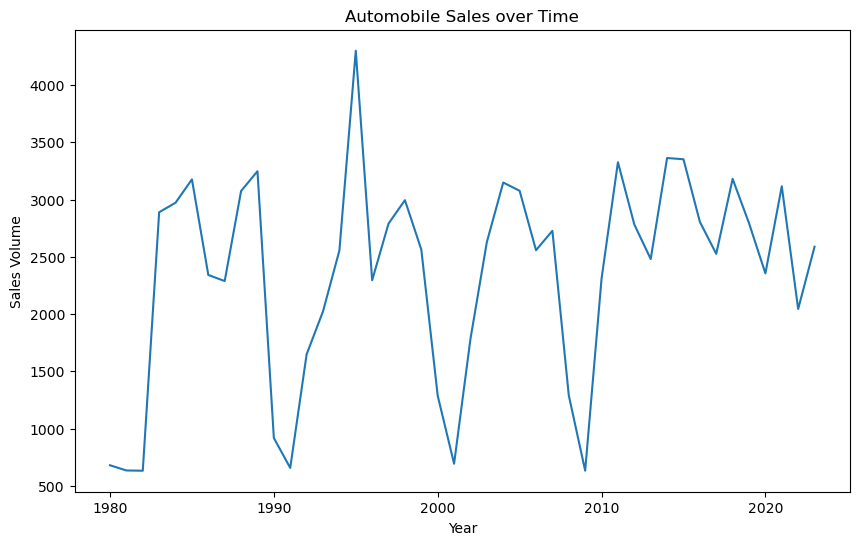

In [7]:
# Create data for plotting
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()

# Create the plot
plt.figure(figsize=(10, 6))
df_line.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales over Time')
plt.show()

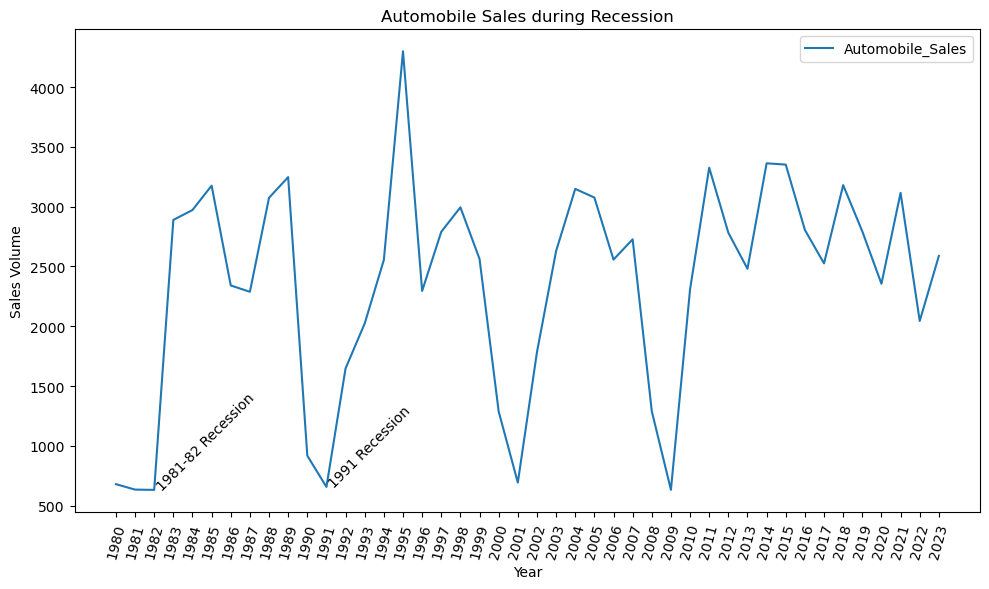

In [9]:
# Enhanced plot with x-axis ticks and annotations

plt.figure(figsize=(10, 6))
df_line.plot(kind='line')
plt.xticks(list(range(1980, 2024)), rotation=75)
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales during Recession')
plt.text(1982, df_line[1982], '1981-82 Recession', rotation=45)
plt.text(1991, df_line[1991], '1991 Recession', rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


---



####  TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?


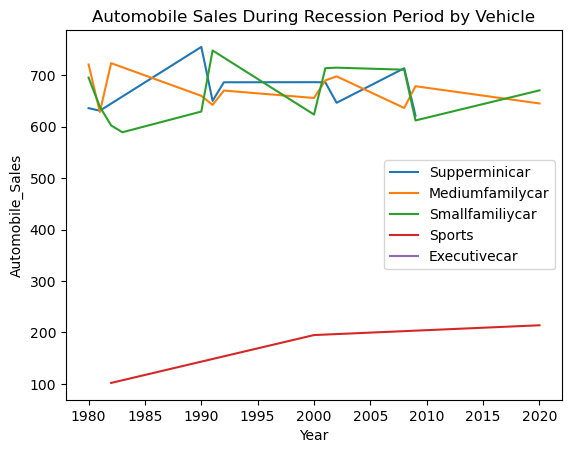

In [13]:
# Plotting the sales trend for each vehicle type during recession
rdf = df[df['Recession'] == 1]
for vehicle in df['Vehicle_Type'].unique():
    sub_data = rdf[rdf['Vehicle_Type'] == vehicle]
    sub_data = sub_data.groupby('Year')['Automobile_Sales'].mean()
    plt.plot(sub_data.index, sub_data.values, label=vehicle)
plt.xlabel('Year')
plt.ylabel('Automobile_Sales')
plt.title('Automobile Sales During Recession Period by Vehicle')    
plt.legend()
plt.show()

### TASK 1.3: Using the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.


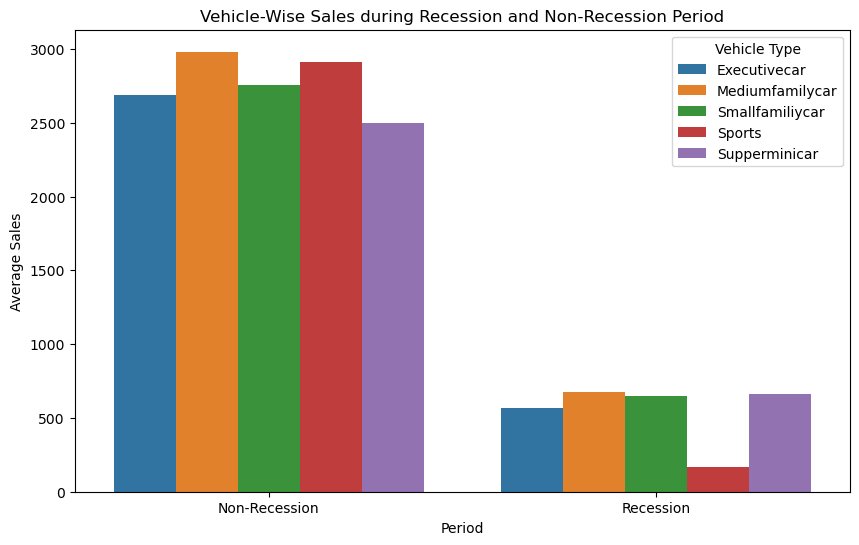

In [14]:
# Grouping data by 'Recession' and 'Vehicle_Type' and calculating the mean 'Automobile_Sales'
dd = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Plotting the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Period')
plt.ylabel('Average Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.legend(title="Vehicle Type")
plt.show()

### TASK 1.4: Using sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.

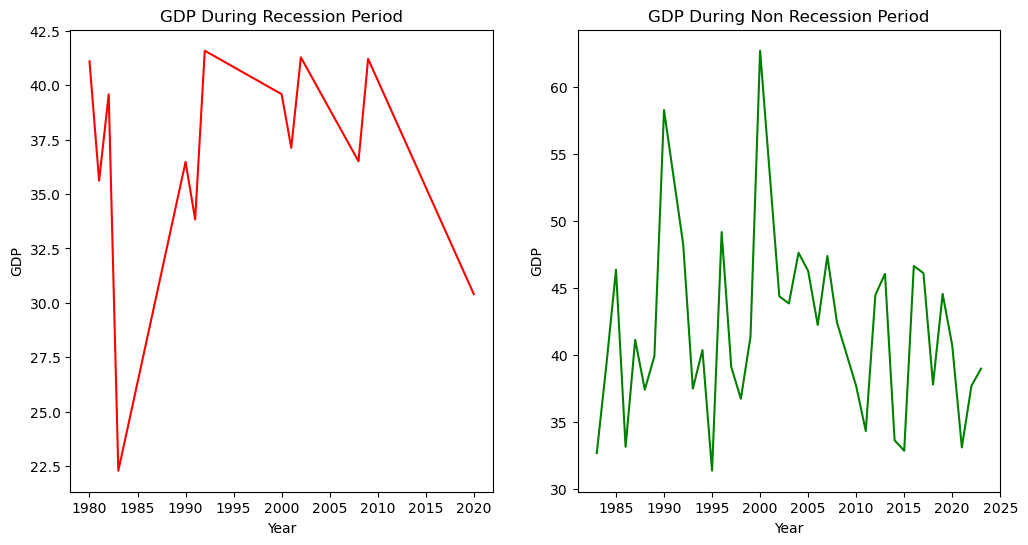

In [16]:
df_recession = df[df.Recession ==1]
df_non_recession = df[df.Recession == 0]
fig=plt.figure(figsize=(12, 6))
data_rec = df_recession.groupby('Year')['GDP'].mean()
data_non_rec = df_non_recession.groupby('Year')['GDP'].mean()
plt.subplot(1, 2, 1)
plt.plot(data_rec.index, data_rec.values, color='red')
plt.title('GDP During Recession Period')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.subplot(1, 2, 2)
plt.plot(data_non_rec.index, data_non_rec, color='green')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP During Non Recession Period')
plt.savefig('Subplot.png')
plt.show()

### TASK 1.5: Developing a Bubble plot for displaying the impact of seasonality on Automobile Sales.

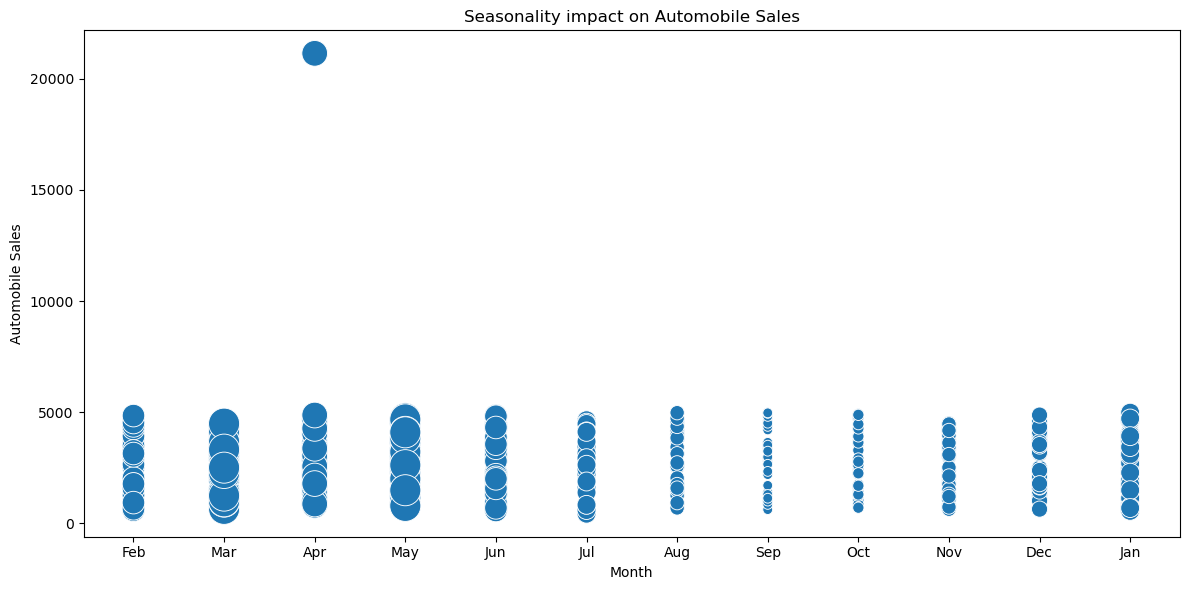

In [17]:
# Filtering for non-recession data
non_rec_data = df[df['Recession'] == 0]

# Using Seasonality_Weight for the size of bubbles
size = non_rec_data['Seasonality_Weight'] * 10  # Amplifying for better visualization

# Creating the bubble plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, legend=False, sizes=(50, 500))
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality impact on Automobile Sales')
plt.tight_layout()
plt.savefig("Bubble.png")
plt.show()

 ### TASK 1.6: Us the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
 

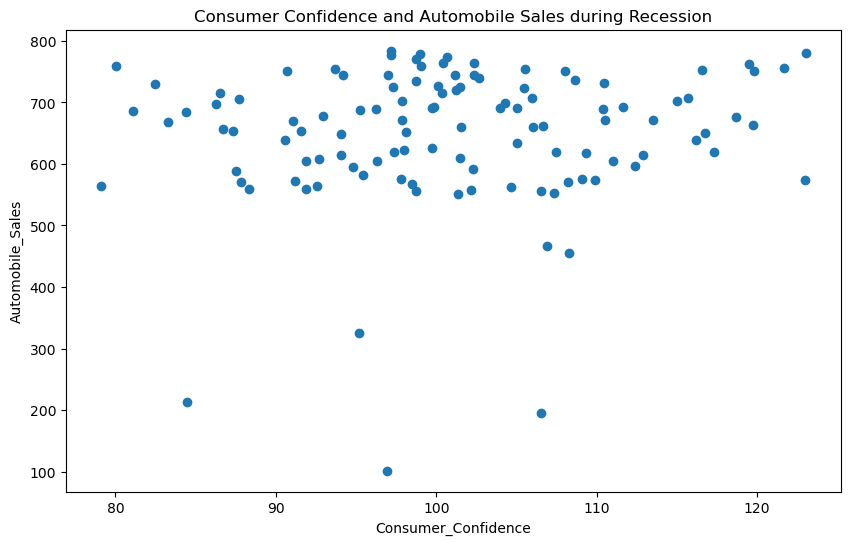

In [18]:
# Filtering for recession data
rec_data = df[df['Recession'] == 1]

# Creating a scatter plot for Consumer Confidence vs. Automobile Sales during recession
plt.figure(figsize=(10, 6))
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])

plt.xlabel('Consumer_Confidence')
plt.ylabel('Automobile_Sales')
plt.title('Consumer Confidence and Automobile Sales during Recession')
plt.savefig('Scatter.png')
plt.show()



 ### How does the average vehicle price relate to the sales volume during recessions?

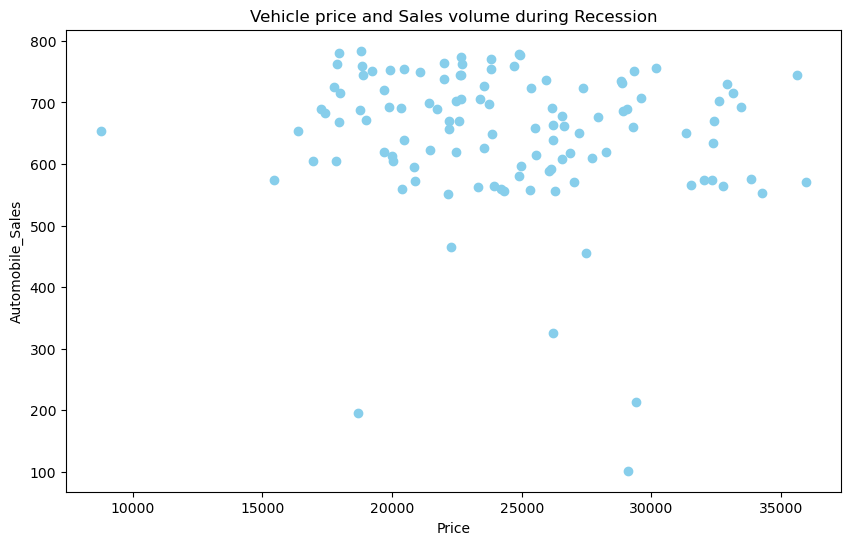

In [20]:

# Creating another scatter plot for Price vs. Automobile Sales during recession
plt.figure(figsize=(10, 6))
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'], color='skyblue')

plt.xlabel('Price')
plt.ylabel('Automobile_Sales')
plt.title('Vehicle price and Sales volume during Recession')
plt.savefig('Scatter.png')
plt.show()

 ### TASK 1.7: Creating a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.
 

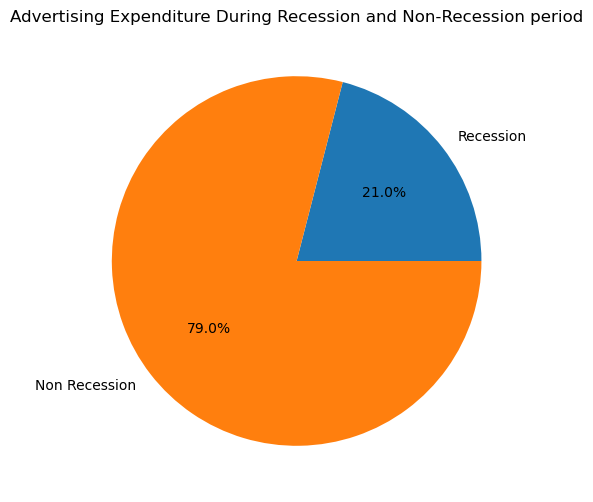

In [21]:
rdata =df[df.Recession == 1]
nrdata = df[df.Recession == 0]
rexpense = rdata.Advertising_Expenditure.sum()
nrexpense = nrdata.Advertising_Expenditure.sum()
sizes = [rexpense, nrexpense]
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels = ['Recession', 'Non Recession'], autopct = '%1.1f%%')
plt.title('Advertising Expenditure During Recession and Non-Recession period')
plt.savefig('Pie_1.png')
plt.show()

### TASK 1.8: Developing a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.to display the total advertisement expenditure for each vehicle type


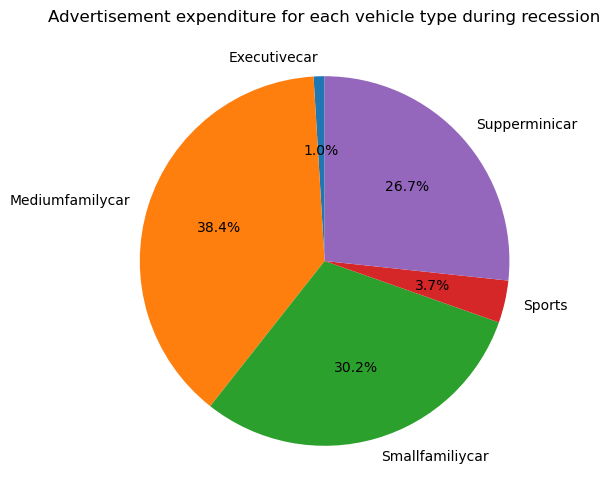

In [31]:
pie_data = df[df['Recession'] == 1].groupby('Vehicle_Type')['Advertising_Expenditure'].sum()
labels = pie_data.index
sizes = pie_data.values
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Advertisement expenditure for each vehicle type during recession')
plt.savefig('Pie_2.png')
plt.show()